In [1]:
!pip install tensorflow keras matplotlib pandas visualkeras #install the library needed 

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 993.7/993.7 kB 5.8 MB/s eta 0:00:00


In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt  
import cv2 
import tensorflow as tf  
from PIL import Image 
import os  
from sklearn.model_selection import train_test_split  
from keras.utils import to_categorical  
from keras.models import Sequential, load_model  
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout 
import keras 
import tensorflow as tf 
from tensorflow import keras
from keras.models import Sequential 
from tensorflow.keras.layers import Input, Dense 
from keras import models 
import visualkeras 

2024-02-18 19:47:06.294036: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-02-18 19:47:06.294159: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-02-18 19:47:06.564383: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [3]:
import zipfile

# Path to the ZIP file (adjust as needed)
zip_file_path1 = '/kaggle/input/datasett/Trainn'
zip_file_path2 = '/kaggle/input/datasett/Testt'
zip_file_path3 = '/kaggle/input/datasett/Metaa'

# Output directory where the contents of the zip will be extracted
output_dir1 = '/kaggle/working/Train'
output_dir2= '/kaggle/working/Test'
output_dir3= '/kaggle/working/Meta'

# Ensure the output directory exists
os.makedirs(output_dir1, exist_ok=True)
os.makedirs(output_dir2, exist_ok=True)
os.makedirs(output_dir3, exist_ok=True)

# Unzipping the file
with zipfile.ZipFile(zip_file_path1, 'r') as zip_ref:
    zip_ref.extractall(output_dir1)
with zipfile.ZipFile(zip_file_path2, 'r') as zip_ref:
    zip_ref.extractall(output_dir2)
with zipfile.ZipFile(zip_file_path3, 'r') as zip_ref:
    zip_ref.extractall(output_dir3)

print(f"Files extracted to: {output_dir1}")
print(f"Files extracted to: {output_dir2}")
print(f"Files extracted to: {output_dir3}")


Files extracted to: /kaggle/working/Train
Files extracted to: /kaggle/working/Test
Files extracted to: /kaggle/working/Meta


In [4]:
cd/kaggle/working/Train

/kaggle/working/Train


In [5]:
os.getcwd()

'/kaggle/working/Train'

In [6]:
# loading dataset
data = []  # List to store the images.
labels = []  # List to store the corresponding labels.
classes = 43  
cur_path = os.getcwd()  # Get the current working directory.


for i in os.listdir(cur_path):
    dir = cur_path + '/' + i  
    
    for j in os.listdir(dir):
        img_path = dir+'/'+j  
        
        # Read the image using OpenCV, resize it to (30, 30), and store it in the data list.
        img = cv2.imread(img_path, -1)
        img = cv2.resize(img, (30, 30), interpolation=cv2.INTER_NEAREST)
        data.append(img)
        labels.append(i) # Append the corresponding label (class) to the labels list.

# Convert data and labels lists to NumPy arrays for further processing.
data = np.array(data)
labels = np.array(labels)

print(data.shape, labels.shape)

(39209, 30, 30, 3) (39209,)


In [7]:
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(31367, 30, 30, 3) (7842, 30, 30, 3) (31367,) (7842,)


In [8]:
#Converting the labels into one hot encoding
y_train = to_categorical(y_train, 43)
y_test = to_categorical(y_test, 43)

In [9]:
y_train.shape, y_test.shape

((31367, 43), (7842, 43))

In [10]:
# Read the training dataset CSV file into a Pandas DataFrame.
train_data = pd.read_csv('/kaggle/input/dataset/Train.csv', usecols=['ClassId', 'Path', 'Width', 'Height'])

# Read the testing dataset CSV file into a Pandas DataFrame.
test_data = pd.read_csv('/kaggle/input/dataset/Test.csv', usecols=['ClassId', 'Path', 'Width', 'Height'])

# Rename the columns in the training dataset for consistency and clarity.
train_data.rename({'ClassId': 'label', 'Path': 'path'}, inplace=True, axis=1)

# Rename the columns in the testing dataset for consistency and clarity.
test_data.rename({'ClassId': 'label', 'Path': 'path'}, inplace=True, axis=1)

# Display the first few rows of the modified training dataset to inspect the changes.
train_data.head()

,Width,Height,label,path
0,27,26,20,Train/20/00020_00000_00000.png
1,28,27,20,Train/20/00020_00000_00001.png
2,29,26,20,Train/20/00020_00000_00002.png
3,28,27,20,Train/20/00020_00000_00003.png
4,28,26,20,Train/20/00020_00000_00004.png


In [11]:
test_data.head()

,Width,Height,label,path
0,53,54,16,Test/00000.png
1,42,45,1,Test/00001.png
2,48,52,38,Test/00002.png
3,27,29,33,Test/00003.png
4,60,57,11,Test/00004.png


In [12]:
# Print the number of classes 
print('No. of classes') 
print(train_data['label'].nunique())

No. of classes
43


In [13]:
cd/kaggle/working

/kaggle/working


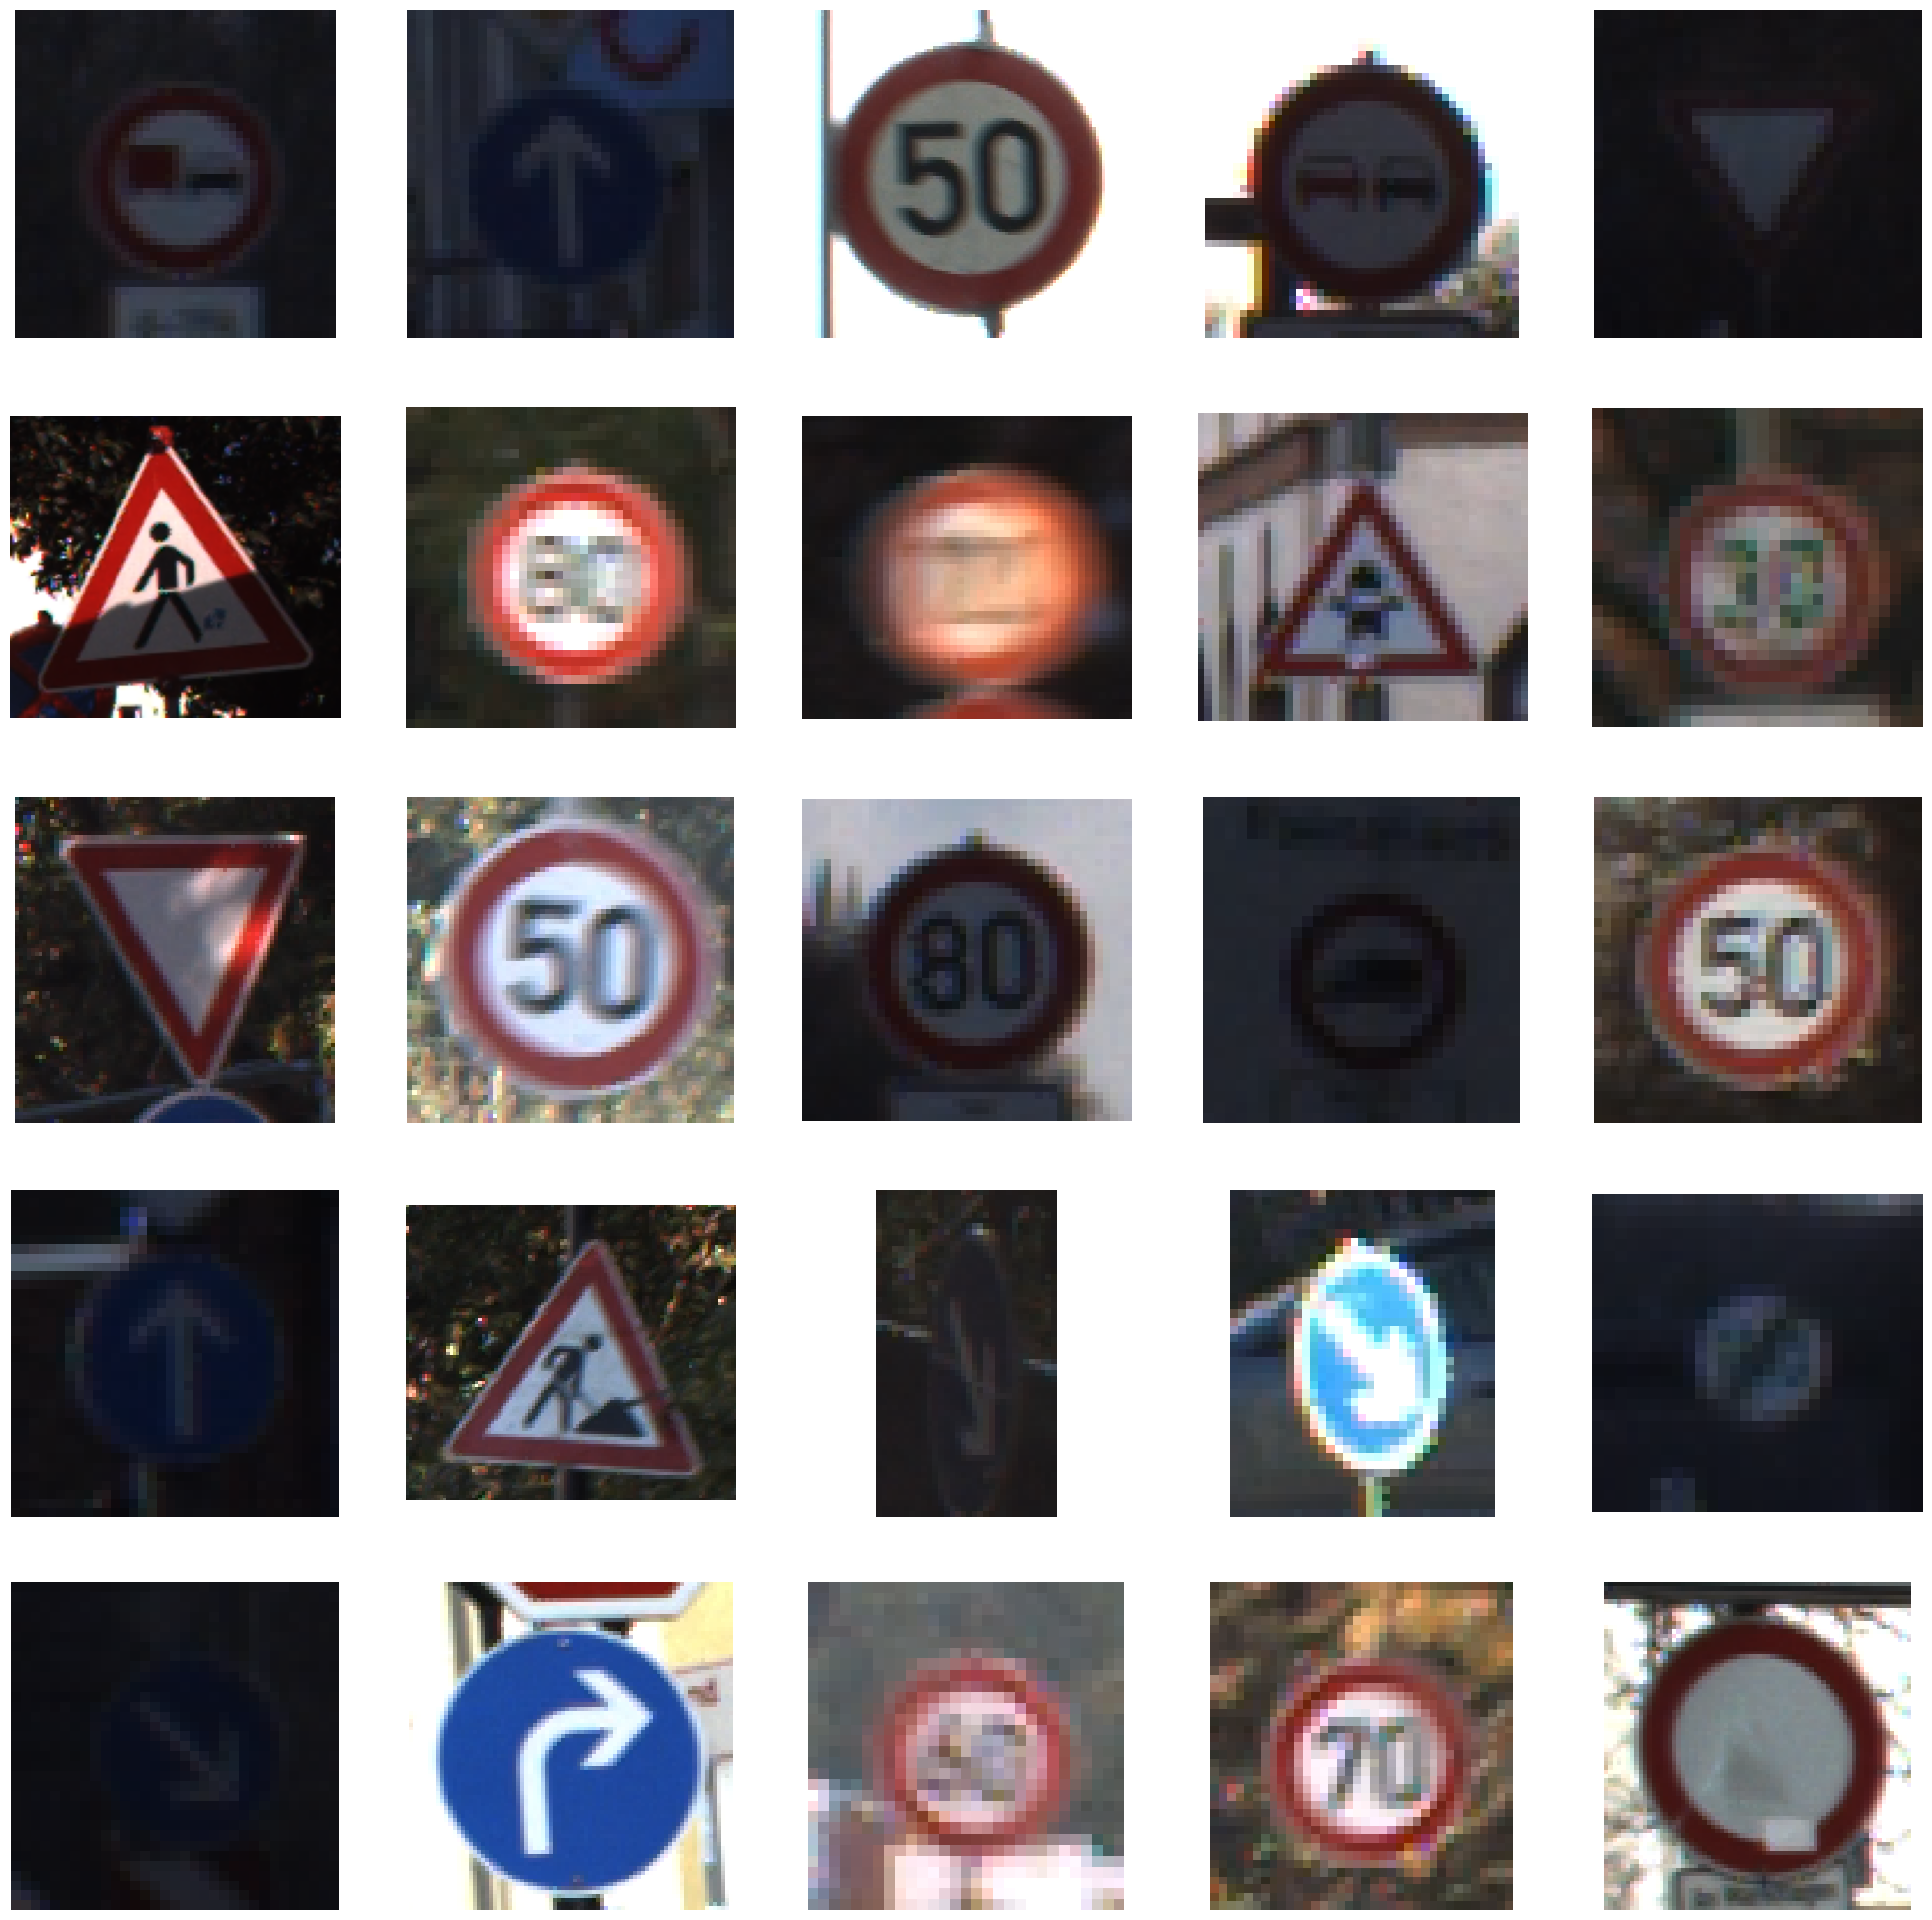

In [14]:
# Import the necessary libraries.
import random
from matplotlib.image import imread

# Get the current working directory.
data_dir = os.getcwd()

# Extract the 'path' column values from the testing dataset.
imgs = test_data['path'].values

# Create a matplotlib figure with a size of 25x25 inches.
plt.figure(figsize=(25, 25))

# Loop to display 25 random images from the dataset.
for i in range(1, 26):
    # Create subplots in a 5x5 grid.
    plt.subplot(5, 5, i)
    
    # Select a random image path from the dataset.
    random_image_path = data_dir + '/' + random.choice(imgs)
    
    # Read and load the random image using imread from matplotlib.
    random_image = imread(random_image_path)
    
    # Display the image.
    plt.imshow(random_image)
    
    # Turn off axis labels.
    plt.axis('off')
    
    # Display the width of the image as the x-axis label.
    plt.xlabel(random_image.shape[0], fontsize=20)
    
    # Display the height of the image as the y-axis label.
    plt.ylabel(random_image.shape[0], fontsize=20)

Text(0, 0.5, 'Number of images')

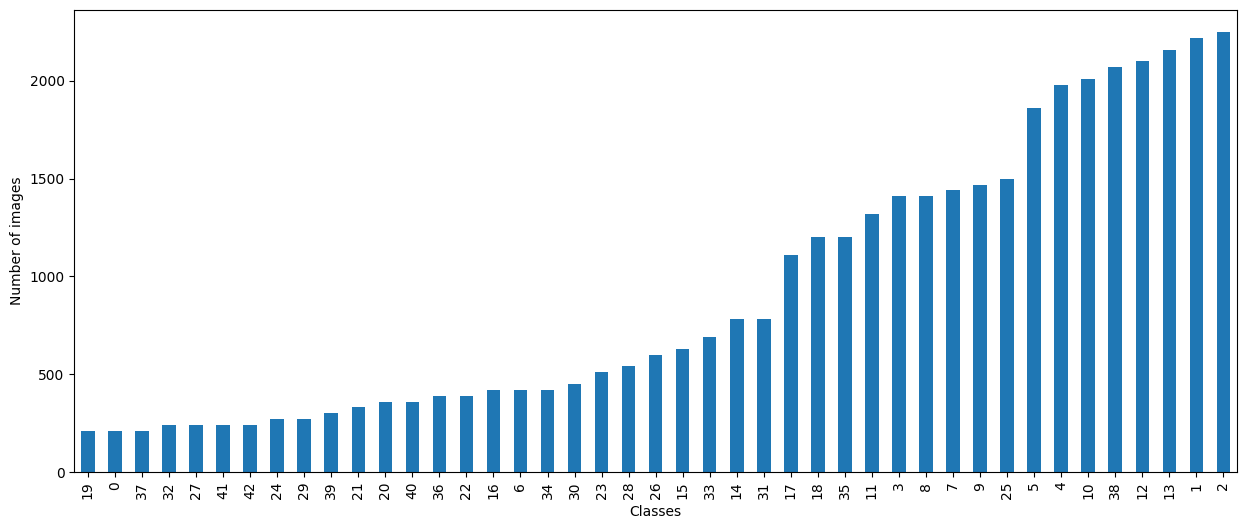

In [15]:
data_dic = {}

# Loop through each folder (class) in the current path.
for folder in os.listdir(cur_path):
    # Count the number of files (images) in the current class folder.
    data_dic[folder] = len(os.listdir(cur_path + '/' + folder))

# Create a Pandas Series from the dictionary.
data_df = pd.Series(data_dic)

plt.figure(figsize=(15, 6))
data_df.sort_values().plot(kind='bar')  
plt.xlabel('Classes')  
plt.ylabel('Number of images')  

In [16]:
#Building the model
model = Sequential()

# First Layer
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu', input_shape=X_train.shape[1:]))
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))

# Second Layer 
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))


# Dense Layer
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(43, activation='softmax'))

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        2432      
                                                                 
 conv2d_1 (Conv2D)           (None, 22, 22, 32)        25632     
                                                                 
 max_pooling2d (MaxPooling2  (None, 11, 11, 32)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 11, 11, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 9, 9, 64)          18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 7, 7, 64)          36928     
                                                        

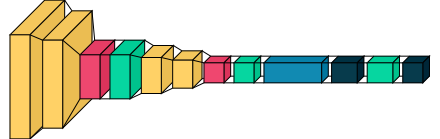

In [18]:
visualkeras.layered_view(model)

In [19]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

epochs = 20
history = model.fit(X_train, y_train, batch_size=64, epochs=epochs, validation_data=(X_test, y_test))

#model.save('/kaggle/working/my_model.h5')

Epoch 1/20


2024-02-18 19:47:48.238233: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential/dropout/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer
I0000 00:00:1708285672.495988      78 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


491/491 [==============================] - 12s 8ms/step - loss: 2.8835 - accuracy: 0.2901 - val_loss: 1.6247 - val_accuracy: 0.5476
Epoch 2/20
491/491 [==============================] - 3s 7ms/step - loss: 1.3864 - accuracy: 0.5776 - val_loss: 0.6519 - val_accuracy: 0.8127
Epoch 3/20
491/491 [==============================] - 3s 7ms/step - loss: 0.7291 - accuracy: 0.7750 - val_loss: 0.3153 - val_accuracy: 0.9143
Epoch 4/20
491/491 [==============================] - 4s 7ms/step - loss: 0.4977 - accuracy: 0.8463 - val_loss: 0.2852 - val_accuracy: 0.9166
Epoch 5/20
491/491 [==============================] - 3s 6ms/step - loss: 0.3956 - accuracy: 0.8779 - val_loss: 0.1794 - val_accuracy: 0.9457
Epoch 6/20
491/491 [==============================] - 3s 7ms/step - loss: 0.3270 - accuracy: 0.8979 - val_loss: 0.1621 - val_accuracy: 0.9503
Epoch 7/20
491/491 [==============================] - 3s 7ms/step - loss: 0.2997 - accuracy: 0.9101 - val_loss: 0.0868 - val_accuracy: 0.9768
Epoch 8/20
491/4

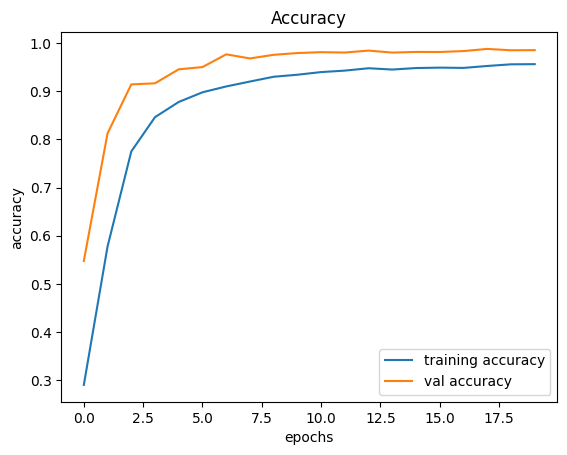

In [20]:
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

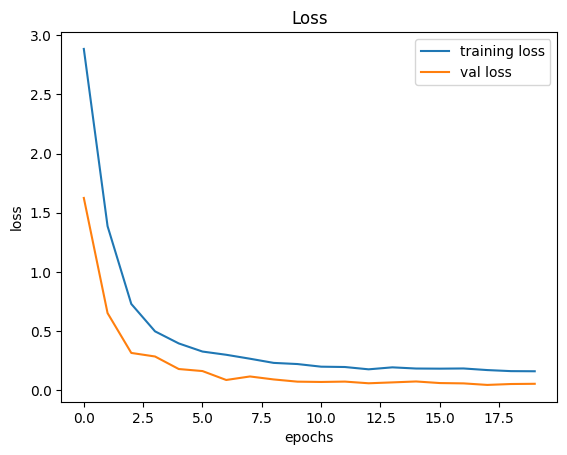

In [21]:
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [22]:
score = model.evaluate(X_test, y_test, verbose=0)

# Print the test loss 
print('Test Loss', score[0])

# Print the test accuracy 
print('Test accuracy', score[1])

Test Loss 0.05457177758216858
Test accuracy 0.9854629039764404


In [23]:
y_pred = model.predict(X_test)

# Extract the true class labels from the one-hot encoded 'y_test'.
y_test_class = np.argmax(y_test, axis=1)

# Extract the predicted class labels from the one-hot encoded 'y_pred'.
y_pred_class = np.argmax(y_pred, axis=1)

246/246 [==============================] - 1s 2ms/step


In [24]:
from sklearn.metrics import classification_report, confusion_matrix

# Print the classification report, which includes precision, recall, and F1-score.
print(classification_report(y_test_class, y_pred_class))

# Print the confusion matrix, which shows the number of true positive, true negative, false positive, and false negative predictions.
print(confusion_matrix(y_test_class, y_pred_class))

              precision    recall  f1-score   support

           0       0.97      0.88      0.92        32
           1       0.99      0.96      0.98       470
           2       0.99      0.98      0.98       462
           3       0.99      0.98      0.98       288
           4       0.95      1.00      0.97       421
           5       0.96      0.97      0.97       346
           6       1.00      1.00      1.00        81
           7       0.98      0.98      0.98       290
           8       0.98      0.99      0.98       269
           9       0.99      1.00      1.00       284
          10       0.99      1.00      0.99       392
          11       1.00      1.00      1.00       225
          12       1.00      1.00      1.00       413
          13       0.99      1.00      1.00       418
          14       1.00      1.00      1.00       165
          15       0.98      0.97      0.98       125
          16       1.00      1.00      1.00        79
          17       1.00    

In [25]:
# Calculate the Accuracy
# Import the accuracy_score function from scikit-learn.
from sklearn.metrics import accuracy_score

# Calculate the accuracy by comparing predicted class labels (y_pred_class) with true class labels (y_test_class).
score = accuracy_score(y_pred_class, y_test_class)

# Display the computed accuracy score.
score

0.9854628921193573

In [26]:
# Save the trained model to a file named 'traffic_classifier.h5' in the working directory.
model.save('/kaggle/working/traffic_classifier.h5')

/opt/conda/lib/python3.10/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [27]:
from keras.models import load_model
model = load_model("/kaggle/working/traffic_classifier.h5")

In [28]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
def test_on(img):
    data =[]
    image = Image.open(img)
    image = image.resize((30,30))
    data.append(np.array(image))
    x_test = np.array(data)
    y_pred = np.argmax(model.predict(x_test) ,axis = -1)
    return image  ,y_pred

In [29]:
classes = { 0:'Speed limit (20km/h)',
            1:'Speed limit (30km/h)', 
            2:'Speed limit (50km/h)', 
            3:'Speed limit (60km/h)', 
            4:'Speed limit (70km/h)', 
            5:'Speed limit (80km/h)', 
            6:'End of speed limit (80km/h)', 
            7:'Speed limit (100km/h)', 
            8:'Speed limit (120km/h)', 
            9:'No passing', 
            10:'No passing veh over 3.5 tons', 
            11:'Right-of-way at intersection', 
            12:'Priority road', 
            13:'Yield', 
            14:'Stop', 
            15:'No vehicles', 
            16:'Veh > 3.5 tons prohibited', 
            17:'No entry', 
            18:'General caution', 
            19:'Dangerous curve left', 
            20:'Dangerous curve right', 
            21:'Double curve', 
            22:'Bumpy road', 
            23:'Slippery road', 
            24:'Road narrows on the right', 
            25:'Road work', 
            26:'Traffic signals', 
            27:'Pedestrians', 
            28:'Children crossing', 
            29:'Bicycles crossing', 
            30:'Beware of ice/snow',
            31:'Wild animals crossing', 
            32:'End speed + passing limits', 
            33:'Turn right ahead', 
            34:'Turn left ahead', 
            35:'Ahead only', 
            36:'Go straight or right', 
            37:'Go straight or left', 
            38:'Keep right', 
            39:'Keep left', 
            40:'Roundabout mandatory', 
            41:'End of no passing', 
            42:'End no passing veh > 3.5 tons' }

1/1 [==============================] - 0s 464ms/step
Predicted traffic sign is:  Speed limit (70km/h)


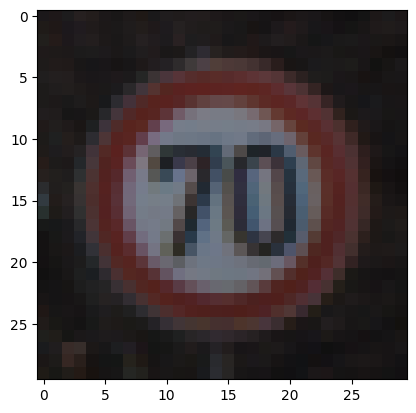

In [30]:
plot,prediction = test_on(r'/kaggle/working/Test/00062.png')
s = [str(i) for i in prediction] 
a = int("".join(s)) 
print("Predicted traffic sign is: ", classes[a])
plt.imshow(plot)
plt.show()